In [18]:
#importing necessery libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)# using pandas setting options to display maximum rows
pd.set_option("display.max_rows",None)
pd.set_option("display.width",500)
pd.set_option("display.expand_frame_repr",False)


In [19]:
movies = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\moviesmetadata.csv")
ratings = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\ratings.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2748\1641987460.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\moviesmetadata.csv")


In [16]:
# Check column names
print(movies.columns)

# Display DataFrame
print(movies)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'], dtype='object')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
# Step 1: Inspect the Data
print("Movies DataFrame Head:")
print(movies.head())

print("\nRatings DataFrame Head:")
print(ratings.head())


Movies DataFrame Head:
   adult                              belongs_to_collection    budget                                             genres                              homepage     id    imdb_id original_language               original_title                                           overview popularity                       poster_path                               production_companies                               production_countries release_date      revenue  runtime                                   spoken_languages    status                                            tagline                        title  video  vote_average  vote_count
0  FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  http://toystory.disney.com/toy-story    862  tt0114709                en                    Toy Story  Led by Woody, Andy's toys live happily in his ...  21.946943  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg     [{'name': 'Pixar Anima

In [20]:
# Display information about the movies DataFrame
print("Movies DataFrame Info:")
print(movies.info())

# Display information about the ratings DataFrame
print("\nRatings DataFrame Info:")
print(ratings.info())

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 no

In [22]:
# Step 2: Handle Missing Values
print("\nMovies DataFrame Missing Values:")
print(movies.isnull().sum())

print("\nRatings DataFrame Missing Values:")
print(ratings.isnull().sum())


Movies DataFrame Missing Values:
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Ratings DataFrame Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [23]:
# Drop columns with more than 100 missing values
threshold = 100
columns_to_drop = movies.columns[movies.isnull().sum() > threshold]
movies_cleaned = movies.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("Movies DataFrame after dropping columns with more than 100 missing values:")
print(movies_cleaned.head())

Movies DataFrame after dropping columns with more than 100 missing values:
   adult    budget                                             genres     id    imdb_id original_language               original_title popularity                               production_companies                               production_countries release_date      revenue                                   spoken_languages    status                        title  video  vote_average  vote_count
0  FALSE  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862  tt0114709                en                    Toy Story  21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released                    Toy Story  False           7.7      5415.0
1  FALSE  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844  tt0113497                en                      Juma

In [24]:
# Check for missing values in the cleaned DataFrame
print("Missing values in movies_cleaned DataFrame:")
print(movies_cleaned.isnull().sum())

Missing values in movies_cleaned DataFrame:
adult                    0
budget                   0
genres                   0
id                       0
imdb_id                 17
original_language       11
original_title           0
popularity               5
production_companies     3
production_countries     3
release_date            87
revenue                  6
spoken_languages         6
status                  87
title                    6
video                    6
vote_average             6
vote_count               6
dtype: int64


In [25]:
# Drop rows with any missing values
movies_cleaned = movies_cleaned.dropna(axis=0)

# Display the cleaned DataFrame
print("Movies DataFrame after dropping rows with missing values:")
print(movies_cleaned.head())

Movies DataFrame after dropping rows with missing values:
   adult    budget                                             genres     id    imdb_id original_language               original_title popularity                               production_companies                               production_countries release_date      revenue                                   spoken_languages    status                        title  video  vote_average  vote_count
0  FALSE  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862  tt0114709                en                    Toy Story  21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released                    Toy Story  False           7.7      5415.0
1  FALSE  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844  tt0113497                en                      Jumanji  17.015539  [

In [26]:
# Check for missing values in the cleaned DataFrame
print("Missing values in movies_cleaned DataFrame after dropping rows:")
print(movies_cleaned.isnull().sum())

Missing values in movies_cleaned DataFrame after dropping rows:
adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64


In [27]:

from scipy import stats

# Define a function to identify outliers using Z-score method
def find_outliers_z_score(data):
    z_scores = np.abs(stats.zscore(data))
    threshold = 3
    outliers = np.where(z_scores > threshold)
    return outliers

# Find outliers in ratings DataFrame
ratings_outliers = find_outliers_z_score(ratings['rating'])
print("Outliers in Ratings DataFrame:")
print(ratings.iloc[ratings_outliers])

# Find outliers in movies_cleaned DataFrame for numeric columns
numeric_columns = movies_cleaned.select_dtypes(include=np.number).columns
for column in numeric_columns:
    outliers = find_outliers_z_score(movies_cleaned[column])
    print(f"\nOutliers in {column} column of Movies DataFrame:")
    print(movies_cleaned.iloc[outliers])


Outliers in Ratings DataFrame:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Outliers in revenue column of Movies DataFrame:
       adult     budget                                             genres      id    imdb_id original_language                                     original_title  popularity                               production_companies                               production_countries release_date       revenue                                   spoken_languages    status                                              title  video  vote_average  vote_count
0      FALSE   30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...     862  tt0114709                en                                          Toy Story   21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  3.735540e+08           [{'iso_639_1': 'en', 'name': 'English'}]  Released                                   

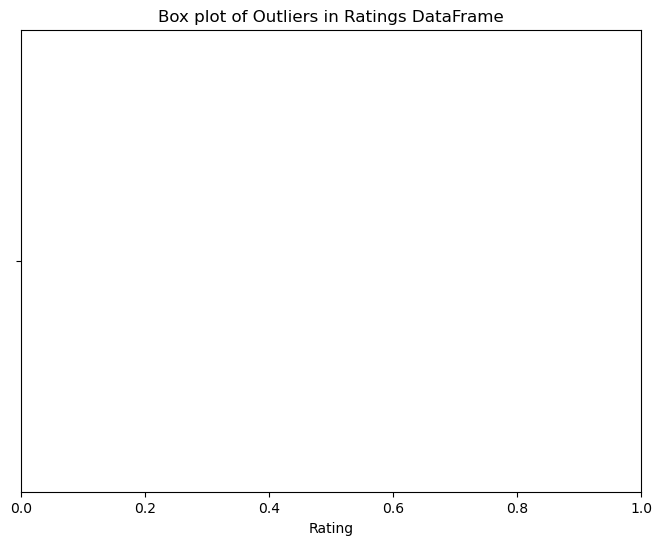

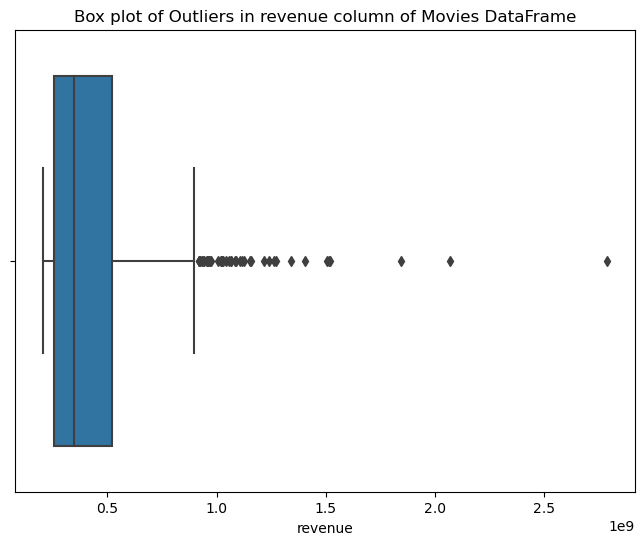

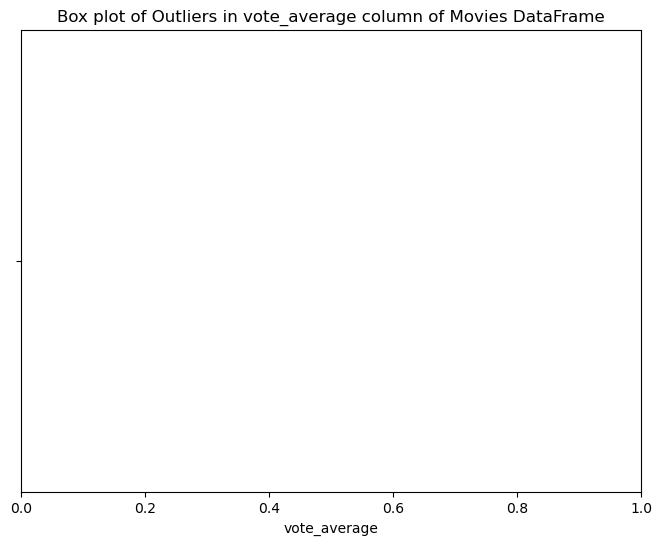

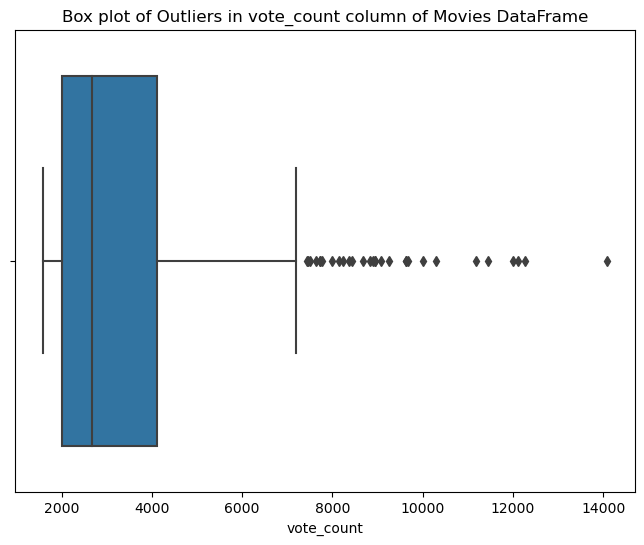

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for outliers in ratings DataFrame
plt.figure(figsize=(8, 6))
sns.boxplot(x=ratings.iloc[ratings_outliers[0]]['rating'])
plt.title('Box plot of Outliers in Ratings DataFrame')
plt.xlabel('Rating')
plt.show()

# Create box plots for outliers in numeric columns of movies_cleaned DataFrame
for column in numeric_columns:
    outliers_data = movies_cleaned.iloc[find_outliers_z_score(movies_cleaned[column])[0]][column]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=outliers_data)
    plt.title(f'Box plot of Outliers in {column} column of Movies DataFrame')
    plt.xlabel(column)
    plt.show()


# it is clear that the ratings file do not have any outlier as well as outliers in another file are not that important as those columns do not provide much help in context of our analysis.